In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from collections import Counter, defaultdict
minTeam = 5
maxTeam = 15
count = 1
numberOfSamples = 1000
finalIndices = [0]*numberOfSamples
def shouldAlgoStart():
    
    
    
    X, y_true = make_blobs(n_samples=numberOfSamples, centers=4,
                            cluster_std=0.60, random_state=0)
    plt.scatter(X[:, 0], X[:, 1], s=50);
    
    if numberOfSamples > 100:
        kmeansAlgo(X, '')

def kmeansAlgo(X, prevIndexList):
    global count
    global minTeam
    global maxTeam
    global finalIndices
    clusterNumber = len(X)/10 + 1
    kmeans = KMeans(n_clusters=clusterNumber)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    

    clusters_indices = defaultdict(list)
    for index, c  in enumerate(kmeans.labels_):
        clusters_indices[c].append(index)
    print "Count: ", Counter(kmeans.labels_)
    for i in clusters_indices:
        print "cluster", (i+1), ": ", clusters_indices[i], len(clusters_indices[i])
    
    noMatchPoints = []
    for i in range (0, clusterNumber):
        numberOfTups = Counter(kmeans.labels_)[i]
        if numberOfTups < minTeam:
            pass
        elif numberOfTups <= maxTeam :
            if prevIndexList:
                for j in clusters_indices[i]:
                    finalIndices[prevIndexList[j]] = count
                #count += 1
                print "count1 = ", count
            else:
                for j in clusters_indices[i]:
                    finalIndices[j] = count
            count += 1
            print "count2 = ", count
        else:
            newList = []
            print "recursion"
            for j in clusters_indices[i]:
                currPoint = (X[j][0], X[j][1])
                newList.append(currPoint)
            arrayList = np.array(newList)
            if prevIndexList:
                valueList = []
                for j in clusters_indices[i]:
                    valueList.append(prevIndexList[j])
                valueArrayList = np.array(valueList)
                kmeansAlgo(arrayList, valueList)
            else:
                kmeansAlgo(arrayList, clusters_indices[i])
            
    print "finalIndices: ", finalIndices
    print "final nons: ", finalIndices.count(0)
    print(Counter(finalIndices))
    print count

start
Count:  Counter({47: 27, 76: 24, 42: 22, 80: 21, 12: 20, 63: 20, 3: 19, 15: 19, 50: 19, 21: 18, 22: 18, 46: 17, 60: 17, 6: 16, 16: 16, 64: 16, 31: 15, 55: 15, 69: 15, 93: 15, 9: 14, 41: 14, 100: 14, 13: 13, 66: 13, 77: 13, 81: 13, 5: 12, 23: 12, 65: 12, 14: 11, 35: 11, 48: 11, 49: 11, 91: 11, 97: 11, 0: 10, 1: 10, 2: 10, 11: 10, 18: 10, 24: 10, 33: 10, 56: 10, 72: 10, 78: 10, 85: 10, 87: 10, 7: 9, 8: 9, 17: 9, 19: 9, 29: 9, 75: 9, 83: 9, 84: 9, 99: 9, 26: 8, 28: 8, 36: 8, 37: 8, 38: 8, 68: 8, 4: 7, 25: 7, 39: 7, 54: 7, 57: 7, 67: 7, 74: 7, 86: 7, 92: 7, 27: 6, 34: 6, 40: 6, 52: 6, 61: 6, 73: 6, 88: 6, 10: 5, 59: 5, 79: 5, 82: 5, 94: 5, 20: 4, 30: 4, 32: 4, 43: 4, 45: 4, 53: 4, 58: 4, 71: 4, 89: 4, 90: 4, 44: 3, 51: 3, 70: 3, 62: 2, 95: 2, 98: 2, 96: 1})
cluster 1 :  [25, 278, 619, 664, 688, 807, 889, 922, 948, 958] 10
cluster 2 :  [21, 59, 396, 417, 463, 594, 693, 932, 945, 946] 10
cluster 3 :  [26, 218, 338, 344, 457, 542, 728, 751, 830, 950] 10
cluster 4 :  [31, 82, 98, 116, 16

Count:  Counter({0: 12, 1: 6})
cluster 1 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 15, 16] 12
cluster 2 :  [9, 10, 11, 12, 14, 17] 6
count1 =  29
count2 =  30
count1 =  30
count2 =  31
finalIndices:  [7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 25, 14, 0, 22, 0, 0, 0, 0, 29, 28, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 20, 2, 0, 0, 0, 0, 0, 0, 14, 6, 29, 21, 0, 0, 0, 0, 0, 0, 0, 0, 24, 19, 27, 0, 4, 13, 16, 0, 27, 0, 0, 0, 0, 0, 0, 25, 0, 29, 0, 0, 5, 0, 0, 22, 0, 9, 0, 0, 0, 0, 22, 0, 0, 0, 0, 25, 0, 22, 4, 24, 0, 0, 0, 7, 0, 0, 0, 0, 26, 0, 0, 0, 0, 14, 0, 0, 27, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 26, 5, 12, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 27, 0, 0, 0, 0, 0, 12, 0, 10, 0, 0, 0, 0, 0, 21, 22, 0, 13, 0, 12, 0, 8, 0, 0, 5, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 29, 18, 18, 5, 0, 25, 0

Count:  Counter({0: 10, 1: 6})
cluster 1 :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 13] 10
cluster 2 :  [0, 10, 11, 12, 14, 15] 6
count1 =  72
count2 =  73
count1 =  73
count2 =  74
finalIndices:  [7, 69, 0, 0, 52, 58, 43, 0, 70, 0, 7, 0, 42, 54, 0, 11, 0, 66, 59, 0, 68, 2, 51, 34, 0, 1, 3, 0, 0, 42, 38, 4, 0, 0, 41, 64, 25, 14, 56, 22, 0, 49, 69, 39, 29, 28, 62, 55, 0, 49, 19, 0, 43, 0, 37, 40, 0, 49, 20, 2, 0, 0, 73, 42, 56, 63, 14, 6, 29, 21, 54, 0, 0, 44, 69, 67, 0, 0, 24, 19, 27, 0, 4, 13, 16, 0, 27, 0, 0, 46, 0, 0, 0, 25, 41, 29, 0, 44, 5, 0, 0, 22, 0, 9, 62, 72, 59, 63, 22, 0, 50, 43, 0, 25, 0, 22, 4, 24, 0, 0, 34, 7, 0, 56, 47, 51, 26, 0, 0, 0, 0, 14, 39, 62, 27, 59, 0, 70, 0, 12, 38, 41, 0, 50, 41, 63, 45, 48, 54, 0, 61, 58, 26, 62, 72, 0, 62, 47, 31, 0, 32, 9, 48, 71, 26, 5, 12, 32, 5, 0, 0, 51, 57, 45, 0, 0, 0, 0, 33, 10, 36, 59, 0, 27, 0, 39, 38, 56, 52, 12, 0, 10, 40, 31, 56, 0, 0, 21, 22, 0, 13, 0, 12, 0, 8, 0, 0, 5, 67, 70, 41, 0, 26, 32, 0, 0, 0, 0, 3, 41, 62, 49, 0, 0, 68, 43, 0, 

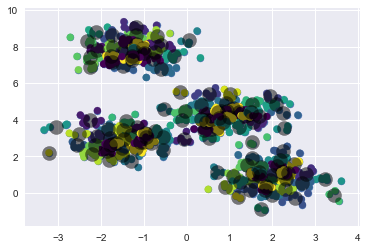

In [16]:
print "start"
if shouldAlgoStart():
    kmeansAlgo(X, '')


In [ ]:
clusters_indices = defaultdict(list)
for i, j in enumerate(finalIndices):
    clusters_indices[j].append(i)
print(Counter(finalIndices))